<a href="https://colab.research.google.com/github/staroIR11/Dataset/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction using LSTM for Nellai Biscuit Suppliers

Part 1

Finding the Total Net Income amount of sales for the next 17 days based on previous 31 days income

#importing essential libraries

In [19]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Preparing independent and dependent features

In [20]:
# Preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [21]:
import pandas as pd
df=pd.read_excel('/content/duta.xlsx')

# label_encoder object knows how to understand word labels.

In [22]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Invoice Date'.
df['Invoice Date']= label_encoder.fit_transform(df['Invoice Date'])
  
df['Invoice Date'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [23]:
df['Invoice Date'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [25]:
df.head(30)

,Brand Desc,Invoice Date,Invoice Qty,Net Amount,Daily Income(Net Amount),milk bikis daily unit
0,Milk Bikis,0,90.0,409.09,171749.92,14479.0
1,50-50,0,24.0,109.09,270900.08,20629.0
2,Tiger Glucose,0,48.0,131.14,170882.34,11536.0
3,Good Day,0,24.0,109.09,134381.80,8032.0
4,Tiger Creams,0,12.0,53.58,140425.52,5577.0
5,Milk Bikis,0,24.0,218.58,0.00,0.0
6,Milk Bikis,0,24.0,218.58,148675.02,6505.0
7,Milk Bikis,0,6.0,54.65,247936.51,25183.0
8,Bourbon,0,6.0,54.65,127139.62,4777.0
9,Treat,0,6.0,54.65,111649.43,8158.0


# Define input sequence(Time Series Data)



In [50]:

timeseries_data = [171749.92,
270900.08,
170882.34,
134381.8,
140425.52,
0,
148675.02,
247936.51,
127139.62,
111649.43,
163741.35,
317683.03,
0,
151610.95,
181369.32,
193588.17,
221181.32,
158578.9,
284285.8,
0,
110315.13,
221687.16,
193129.18,
125863.47,
161339.53,
154265.03,
0,
296935.18,
200765.98,
71127.09
]
# choose a number of time steps
n_steps = 17
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [51]:
print(X),print(y)

[[171749.92 270900.08 170882.34 134381.8  140425.52      0.   148675.02
  247936.51 127139.62 111649.43 163741.35 317683.03      0.   151610.95
  181369.32 193588.17 221181.32]
 [270900.08 170882.34 134381.8  140425.52      0.   148675.02 247936.51
  127139.62 111649.43 163741.35 317683.03      0.   151610.95 181369.32
  193588.17 221181.32 158578.9 ]
 [170882.34 134381.8  140425.52      0.   148675.02 247936.51 127139.62
  111649.43 163741.35 317683.03      0.   151610.95 181369.32 193588.17
  221181.32 158578.9  284285.8 ]
 [134381.8  140425.52      0.   148675.02 247936.51 127139.62 111649.43
  163741.35 317683.03      0.   151610.95 181369.32 193588.17 221181.32
  158578.9  284285.8       0.  ]
 [140425.52      0.   148675.02 247936.51 127139.62 111649.43 163741.35
  317683.03      0.   151610.95 181369.32 193588.17 221181.32 158578.9
  284285.8       0.   110315.13]
 [     0.   148675.02 247936.51 127139.62 111649.43 163741.35 317683.03
       0.   151610.95 181369.32 193588.17 22

(None, None)

In [52]:
X.shape

(13, 17)

# Reshape from [samples, timesteps] into [samples, timesteps, features]

In [53]:
# Reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Define model

In [54]:

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=0)

In [55]:
# demonstrate prediction for next 10 days
x_input = np.array([151610.95,
181369.32,
193588.17,
221181.32,
158578.9,
284285.8,
0,
110315.13,
221687.16,
193129.18,
125863.47,
161339.53,
154265.03,
0,
296935.18,
200765.98,
71127.09])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<17):
    
    if(len(temp_input)>17):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[268031.97]
1 day input [181369.32    193588.17    221181.32    158578.9     284285.8
      0.      110315.13    221687.16    193129.18    125863.47
 161339.53    154265.03         0.      296935.18    200765.98
  71127.09    268031.96875]
1 day output [[114870.24]]
2 day input [193588.17      221181.32      158578.9       284285.8
      0.        110315.13      221687.16      193129.18
 125863.47      161339.53      154265.03           0.
 296935.18      200765.98       71127.09      268031.96875
 114870.2421875]
2 day output [[179370.73]]
3 day input [221181.32      158578.9       284285.8            0.
 110315.13      221687.16      193129.18      125863.47
 161339.53      154265.03           0.        296935.18
 200765.98       71127.09      268031.96875   114870.2421875
 179370.734375 ]
3 day output [[79243.89]]
4 day input [158578.9       284285.8            0.        110315.13
 221687.16      193129.18      125863.47      161339.53
 154265.03           0.        296935.18      2

In [56]:

timeseries_data

[171749.92,
 270900.08,
 170882.34,
 134381.8,
 140425.52,
 0,
 148675.02,
 247936.51,
 127139.62,
 111649.43,
 163741.35,
 317683.03,
 0,
 151610.95,
 181369.32,
 193588.17,
 221181.32,
 158578.9,
 284285.8,
 0,
 110315.13,
 221687.16,
 193129.18,
 125863.47,
 161339.53,
 154265.03,
 0,
 296935.18,
 200765.98,
 71127.09]

In [57]:
len(timeseries_data)

30

In [58]:
lst_output

[268031.97,
 114870.24,
 179370.73,
 79243.89,
 208719.86,
 179473.67,
 29501.957,
 58197.395,
 124301.85,
 113170.53,
 73312.87,
 370715.28,
 61664.875,
 273625.47,
 336212.1,
 194505.89,
 122377.36]

In [59]:
import matplotlib.pyplot as plt

In [66]:
day_new=np.arange(0,30)
day_pred=np.arange(30,47)

#Plotting the prediction

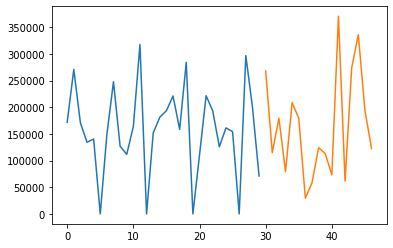

In [67]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)

Part 2

Finding the number of units of milk bikis biscuit would be required in th next 17 days(16-06-2022 to 03-07-2022)


In [70]:
df1=pd.read_excel("/content/duta.xlsx")

In [71]:
df1

,Brand Desc,Invoice Date,Invoice Qty,Net Amount,Daily Income(Net Amount),milk bikis daily unit
0,Milk Bikis,2022-05-17,90.0,409.09,171749.92,14479.0
1,50-50,2022-05-17,24.0,109.09,270900.08,20629.0
2,Tiger Glucose,2022-05-17,48.0,131.14,170882.34,11536.0
3,Good Day,2022-05-17,24.0,109.09,134381.80,8032.0
4,Tiger Creams,2022-05-17,12.0,53.58,140425.52,5577.0
...,...,...,...,...,...,...
22629,NaN,NaT,NaN,NaN,NaN,NaN
22630,NaN,NaT,NaN,NaN,NaN,NaN
22631,NaN,NaT,NaN,NaN,NaN,NaN
22632,NaN,NaT,NaN,NaN,NaN,NaN


In [72]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [73]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df1['Invoice Date']= label_encoder.fit_transform(df1['Invoice Date'])
  
df1['Invoice Date'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [74]:
# define input sequence
timeseries_data = [14479,
20629,
11536,
8032,
5577,
0,
6505,
25183,
4777,
8158,
14162,
20274,
0,
12421,
16857,
19273,
17021,
7974,
19040,
0,
4942,
17592,
8416,
7458,
9484,
11903,
0,
21444,
16223,
4471]

# choose a number of time steps
n_steps = 17
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [76]:
print(X),print(y)

[[14479 20629 11536  8032  5577     0  6505 25183  4777  8158 14162 20274
      0 12421 16857 19273 17021]
 [20629 11536  8032  5577     0  6505 25183  4777  8158 14162 20274     0
  12421 16857 19273 17021  7974]
 [11536  8032  5577     0  6505 25183  4777  8158 14162 20274     0 12421
  16857 19273 17021  7974 19040]
 [ 8032  5577     0  6505 25183  4777  8158 14162 20274     0 12421 16857
  19273 17021  7974 19040     0]
 [ 5577     0  6505 25183  4777  8158 14162 20274     0 12421 16857 19273
  17021  7974 19040     0  4942]
 [    0  6505 25183  4777  8158 14162 20274     0 12421 16857 19273 17021
   7974 19040     0  4942 17592]
 [ 6505 25183  4777  8158 14162 20274     0 12421 16857 19273 17021  7974
  19040     0  4942 17592  8416]
 [25183  4777  8158 14162 20274     0 12421 16857 19273 17021  7974 19040
      0  4942 17592  8416  7458]
 [ 4777  8158 14162 20274     0 12421 16857 19273 17021  7974 19040     0
   4942 17592  8416  7458  9484]
 [ 8158 14162 20274     0 12421 16857

(None, None)

In [77]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [78]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=0)

In [79]:
x_input = np.array([12421,
16857,
19273,
17021,
7974,
19040,
0,
4942,
17592,
8416,
7458,
9484,
11903,
0,
21444,
16223,
4471])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<17):
    
    if(len(temp_input)>17):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[12708.262]
1 day input [16857.         19273.         17021.          7974.
 19040.             0.          4942.         17592.
  8416.          7458.          9484.         11903.
     0.         21444.         16223.          4471.
 12708.26171875]
1 day output [[12910.937]]
2 day input [19273.         17021.          7974.         19040.
     0.          4942.         17592.          8416.
  7458.          9484.         11903.             0.
 21444.         16223.          4471.         12708.26171875
 12910.93652344]
2 day output [[5524.98]]
3 day input [17021.          7974.         19040.             0.
  4942.         17592.          8416.          7458.
  9484.         11903.             0.         21444.
 16223.          4471.         12708.26171875 12910.93652344
  5524.97998047]
3 day output [[6339.741]]
4 day input [ 7974.         19040.             0.          4942.
 17592.          8416.          7458.          9484.
 11903.             0.         21444.         16223.


In [80]:
day_new1=np.arange(0,30)
day_pred1=np.arange(30,47)

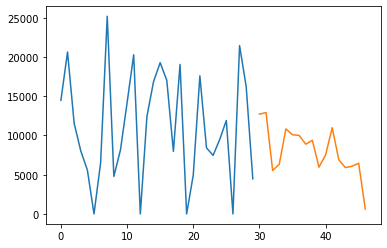

In [81]:
plt.plot(day_new1,timeseries_data)
plt.plot(day_pred1,lst_output)

Done